In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn import metrics

In [2]:
data = pd.read_csv('BostonHousing.csv')
#data = data.drop(['chas'], axis=1)
data.head()
#data['chas'].sum()
data.isna().sum() / data.shape[0]

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

In [3]:
tr, te = train_test_split(data)

y_train = tr['medv']
X_train = tr.drop(['medv'], axis=1)

y_test = te['medv']
X_test = te.drop(['medv'], axis=1)

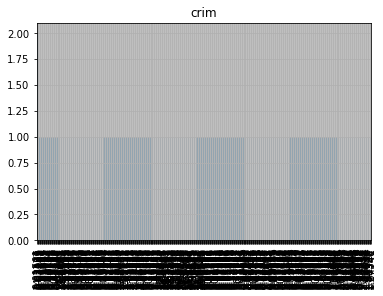

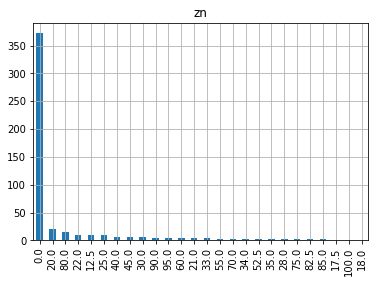

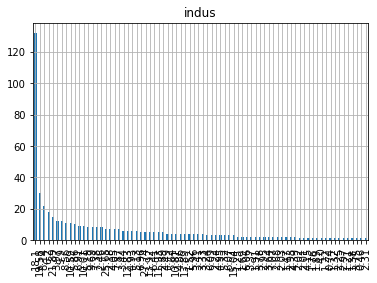

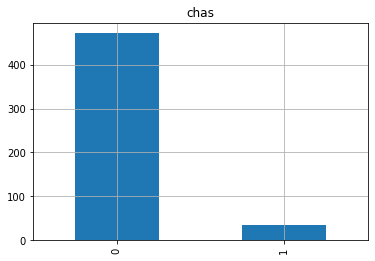

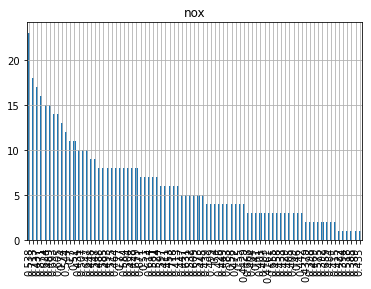

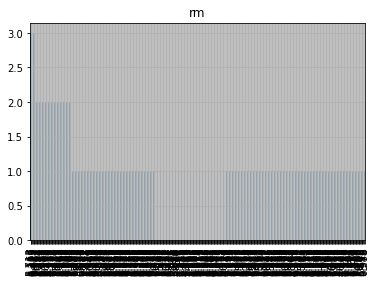

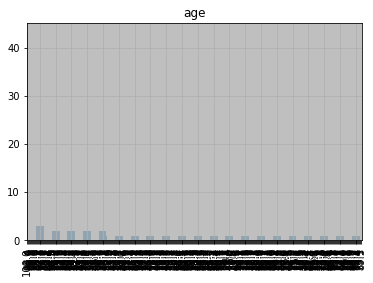

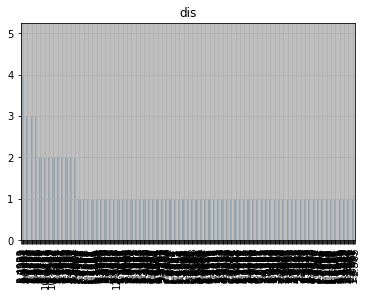

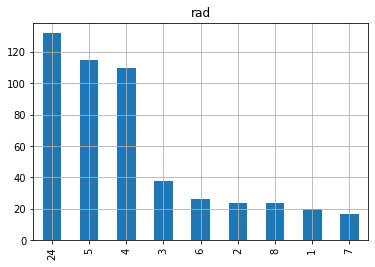

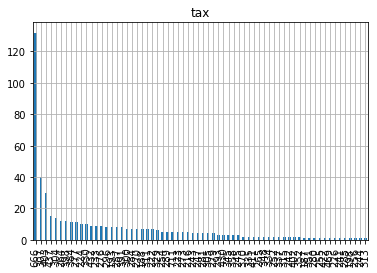

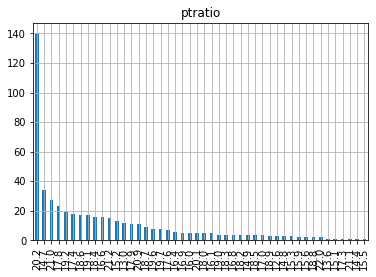

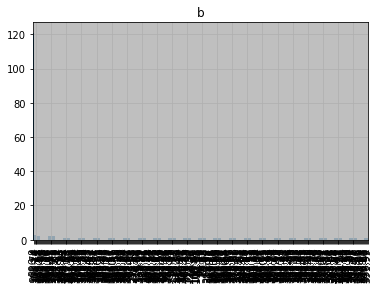

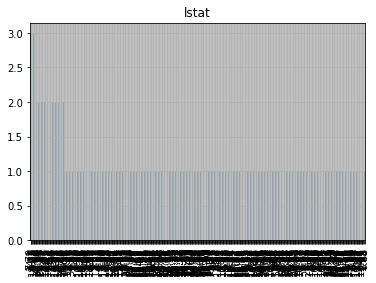

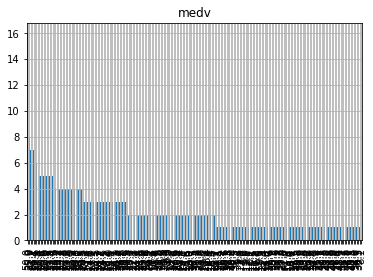

In [4]:
cat_col = data.select_dtypes(exclude=['object'])

for c in cat_col:
    data[c].value_counts().plot(kind='bar')
    plt.title(c)
    plt.grid()
    plt.show()

In [5]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_cols = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat']
transform = ColumnTransformer([
    ('scaler', StandardScaler(), num_cols)
], remainder = 'passthrough')

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipe = Pipeline([
    ('transform', transform),
    ('regression', LinearRegression())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['crim', 'zn', 'indus', 'nox',
                                                   'rm', 'age', 'dis', 'tax',
                                                   'ptratio', 'b',
                                                   'lstat'])])),
                ('regression', LinearRegression())])

In [8]:
y_pred = pipe.predict(X_test)
np.mean((y_pred - y_test)**2)**0.5
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)**0.5

6.385892391422293

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

transform_2 = ColumnTransformer([
    ('scaling', MinMaxScaler(), num_cols)
], remainder='passthrough')

pipe_2 = make_pipeline(
    transform_2,
    LinearRegression()
)
pipe_2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', MinMaxScaler(),
                                                  ['crim', 'zn', 'indus', 'nox',
                                                   'rm', 'age', 'dis', 'tax',
                                                   'ptratio', 'b',
                                                   'lstat'])])),
                ('linearregression', LinearRegression())])

In [10]:
y_pred = pipe_2.predict(X_test)
np.mean((y_pred - y_test)**2)**0.5

6.385892391422296

In [11]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.pipeline import Pipeline

pipe_lasso = Pipeline([
    ('transform', transform),
    ('lasso', Lasso())
])

pipe_ridge = Pipeline([
    ('transform', transform),
    ('ridge', Ridge())
])
pipe_lasso.fit(X_train, y_train)
Y_pred = pipe_lasso.predict(X_test)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, Y_pred)**0.5

7.023312215902124

In [12]:
pipe_ridge.fit(X_train, y_train)
Y_pred = pipe_ridge.predict(X_test)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, Y_pred)**0.5

6.3870831448857786

In [13]:
from sklearn.model_selection import cross_val_score
np.mean((-cross_val_score(pipe_lasso, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))**0.5)

4.9976819967573665

In [14]:
np.mean((-cross_val_score(pipe_ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))**0.5)

4.323430617693812

In [15]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([
    ("prep", transform),
    ('reg', Ridge())
])

param_grid = [{
    'reg': [Ridge(), Lasso()],
    'reg__alpha': [0.001, 0.01, 0.1, 1, 10] },
    {
     'reg': [LinearRegression()]   
    }]

pipe_cv = GridSearchCV(pipe, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')

In [16]:
pipe_cv.fit(X_train, y_train)
pipe_cv.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['crim', 'zn', 'indus', 'nox',
                                                   'rm', 'age', 'dis', 'tax',
                                                   'ptratio', 'b',
                                                   'lstat'])])),
                ('reg', Ridge(alpha=10))])

In [17]:
pipe = Pipeline([
    ('prep', transform,
    'reg', Ridge())
])

param_grid = [{
    'reg': [Ridge(), Lasso()],
    'reg__alpha': [0.1, 1, 10]
}]
pipe_cv = GridSearchCV(pipe, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
pipe_cv.fit(X_train, y_train)

ValueError: too many values to unpack (expected 2)

In [ ]:
pipe = Pipeline([
    ('prep', transform,
    'reg', Ridge())
])

param_grid = [{
    'reg': [Ridge(), Lasso()],
    'reg__alpha': [0.1, 1, 10]},
    {
        'reg':[LinearRegression()]
    }]
pipe_cv = GridSearchCV(pipe, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
pipe_cv.fit(X_train, y_train)
pipe_cv.best_estimator_

ValueError: too many values to unpack (expected 2)

In [ ]:
best_m = pipe_cv.best_estimator_

best_m.fit(X_train, Y_train)
y_pred = best_m.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)**0.5

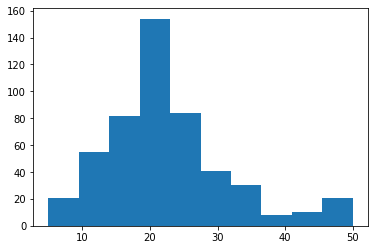

In [ ]:
plt.hist(data['medv'], bins = 100, rwidth = 5)
plt.show()